<a href="https://colab.research.google.com/github/Steven-Macas/SAA/blob/main/paris_SAA_stevenMacas_Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de aprendizaje supervisado**

---

## Nearest-Neighbour

Para cada uno de ellos realizar un documento de google colab con los siguientes epígrafes y tareas:


---


A Importación de librerías necesarias


---



B Preproceso

◦ Importación de los datos del dataset

◦ Mostrar las primeras y últimas filas del dataframe importado

◦ Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

◦ Mostrar un mapa de calor que indique la correlación entre variables

◦ Seleccionar las características a tener en cuenta en el estudio

◦ Separar datos entre datos de entrada y etiquetas (resultados)

◦ Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para
test)


---



C Entrenamiento y predicción

◦ Elegir, instanciar (eligiendo unos valores concretos, por ejemplo k=3 y w=’uniform’) y entrenar el modelo

◦ Realizar una predicción con los datos de prueba



---


D Evaluación

◦Para los problemas de clasificación

*   Mostrar el porcentaje de elementos correctamente clasificados
*   Mostrar la predicción realizada (imprimir la variable con la predicción)
*   Representar gráficamente la clasificación obtenida (matriz de confusión)

◦Para los problemas de regresión

*   Mostrar el error cuadrático medio (mean_squared_error)
*   Mostrar el error absoluto medio (mean_absolute_error)
*   Representar gráficamente los valores predichos con los valores reales

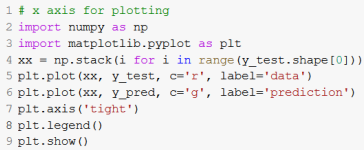

---


E Optimización de hiperparámetros

◦ Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k desde 1 a 30.

◦Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits = 5). Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

◦Finalmente los parámetros elegidos serán los que den mejor media de esas medidas anteriormente nombradas.

◦ Una vez obtenidos esos parámetros óptimos los aplicaremos al problema en cuestión y mostraremos los resultados.

1. https://www.kaggle.com/yasserh/wine-quality-dataset . Clasificación de la calidad del vino según
alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de
datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en
clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

2. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Clasificación binaria. El
objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos
(edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si
tienen enfermedad o no.

3. https://www.kaggle.com/mssmartypants/paris-housing-price-prediction. Predicción de precios de las
casas de París. El dataset contiene una serie de datos de casas, como por ejemplo número de
habitaciones, año de construcción, piscina, garaje, etc. y el precio por el que se han vendido. El
objetivo es, dada una serie de parámetros, predecir el precio que debe tener la casa.

---

# **A** -Importación de librerías

In [ ]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Para el mapa de calor, hacer celdas grandes
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
import statistics

---


# **B** - Preproceso

In [ ]:
data = pd.read_csv('ParisHousing.csv') #Dataset de las casas de París



---



In [ ]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
data.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4


In [ ]:
data.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object



---



In [ ]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


---

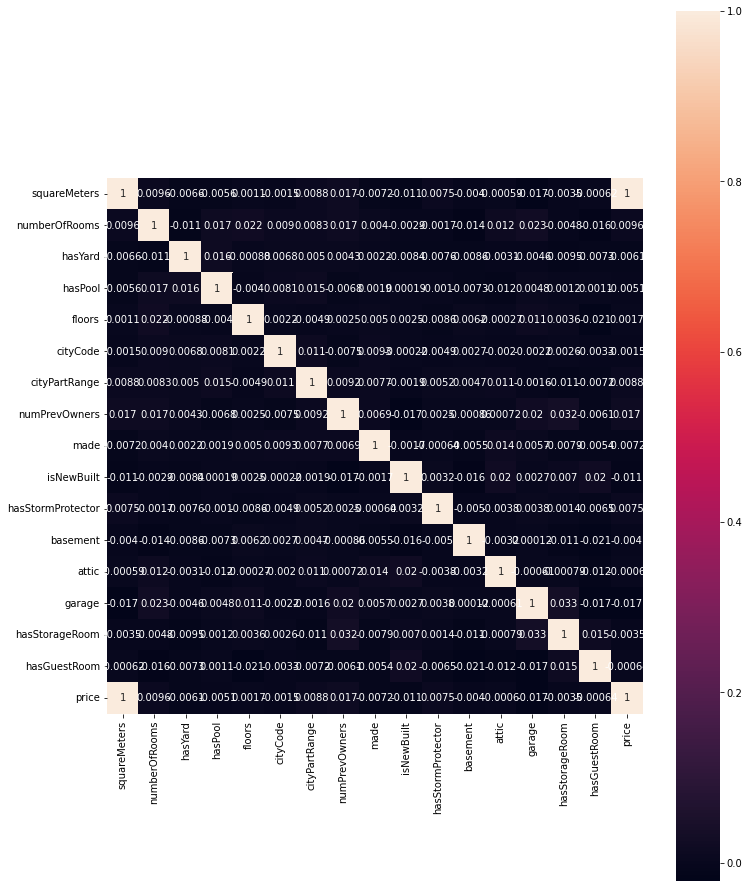

In [ ]:
#Mapa de Calor del DataFrame de las casas de París
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

---

**La característica que tendremos en cuenta para el estudio serán los precios de las casas**



In [ ]:
#separamos datos de entrada y salida Casas
x_data = data.drop('price', axis=1)
y_data = data['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.75)

# **C** - Entrenamiento y Predicción

In [ ]:
#parámetros
k = 3 #Número de 'vecinos'
w = 'uniform'

In [ ]:
model = KNeighborsRegressor(k, weights=w) #Usamos el modelo KNN dentro de model
model.fit(x_train,y_train) #Lo entrenamos
y_predict = model.predict(x_test) #Haremos una predicción

# ***D*** - Evaluación

## **Problemas de regresión**

In [ ]:
y_predict #Haremos una predicción

array([7630654.5       , 7641028.9       , 1735150.13333333, ...,
       7414689.3       , 9818739.23333333, 4112895.46666667])

In [ ]:
#Mostramos el porcentaje de acierto que tenemos al clasificar una casa correctamente escogiendo uno del dataset al azar
clasificar = pd.DataFrame({'squareMeters':[44403], 'numberOfRooms':[29], 'hasYard':[1], 'hasPool':[1], 'floors':[12],
        'cityCode':[34606], 'cityPartRange':[9], 'numPrevOwners':[4], 'made':[1990], 'isNewBuilt':[0], 'hasStormProtector':[1], 
        'basement':[9061], 'attic':[1742], 'garage':[230], 'hasStorageRoom':[0], 'hasGuestRoom':[0]})

In [ ]:
any_house = model.predict(clasificar)[0]

In [ ]:
any_house

4832125.666666666

### **Error cuadrático medio**

In [ ]:
print(mean_squared_error(y_predict, y_test)) #House

13634514898.74741


### **Error absoluto medio**

In [ ]:
print(mean_absolute_error(y_predict, y_test))#House

92792.66419111111


### **Representación gráfica**

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


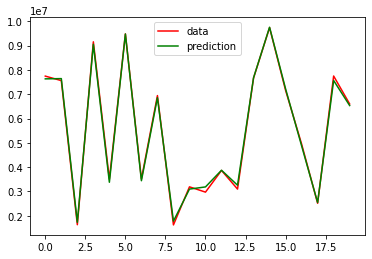

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[:20], c='r', label = 'data')
plt.plot(A,y_predict[:20], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


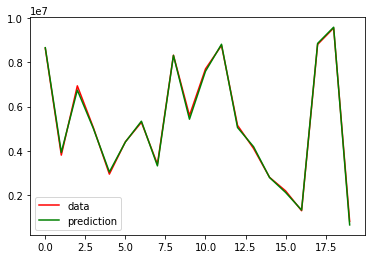

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[20:40], c='r', label = 'data')
plt.plot(A,y_predict[20:40], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


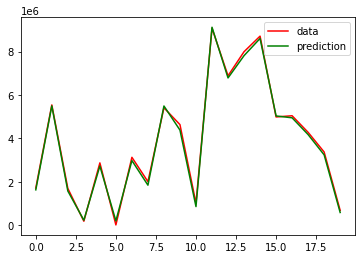

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[40:60], c='r', label = 'data')
plt.plot(A,y_predict[40:60], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()



---

# **E** - Optimización de hiperparámetros

## **Combinación de parámetros óptima**

## Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k desde 1 a 30.

In [ ]:
#Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits =5).
#Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)),
#como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

opt_uniform = 0.0
opt_distance = 0.0
k_opt_uniform = 1
k_opt_distance = 1

for i in range(1,30):
  k = i
  w1 = 'uniform'
  w2 = 'distance'
  print(i)
  resultados_prob = []
  kf = KFold(n_splits=5) #Indicamos que se repetirá 5 veces
  for train, test in kf.split(x_train):
    model = KNeighborsRegressor(k, weights=w1)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_uniform = mean_absolute_error(y_test,y_predict)
    print(f'Score: {porcentage_uniform}')
    resultados_prob.append(porcentage_uniform) #Guardamos el porcentaje para hacer la media y tener un menor margen de error
  media_prob = statistics.mean(resultados_prob)
  print(f'Media: {media_prob}')

  if media_prob > opt_uniform:
    opt_uniform = media_prob
    print(opt_uniform)
    k_opt_uniform = k
  print('-----------------')
  resultados_prob.clear()
  media_prob = 0
  kf = KFold(n_splits=5)
  for train, test in kf.split(x_train):
    model = KNeighborsRegressor(k, weights=w2)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_distance = mean_absolute_error(y_test,y_predict)
    print(f'Score: {porcentage_uniform}')
    resultados_prob.append(porcentage_distance)
  media_prob = statistics.mean(resultados_prob)
  print(f'Media: {media_prob}')

  if media_prob > opt_distance:
    opt_distance = media_prob
    print(opt_distance)
    k_opt_distance = k
  resultados_prob.clear()
  media_prob = 0

In [17]:
#Imprimimos la mejor combinación tanto uniform/distance que tenemos a la hora de tener en cuenta el numero K
print(k_opt_distance)
k_opt_uniform

28


20

### Imprimimos la probabilidad de acierto tanto de uniform como distance

In [ ]:
opt_distance

129223.3804

In [ ]:
opt_uniform

129223.38039999998

## Parámetros óptimos obtenidos

In [ ]:
#aplicamos los datos obtenidos al problema en cuestión
modelo_final = KNeighborsRegressor(n_neighbors=16, weights="distance")
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.75)
modelo_final.fit(x_train, y_train)
y_predict = modelo_final.predict(x_test)

# Error cuadrático medio
squared_error = mean_squared_error(y_test, y_predict)
# Error absoluto medio
absolute_error = mean_absolute_error(y_test, y_predict)

print('Estos son los resultados')
print('------------------------')
print('Error cuadrático medio: ', round(squared_error,2))
print('Error absoluto medio: ', round(absolute_error,2))

Estos son los resultados
------------------------
Error cuadrático medio:  7788288611.96
Error absoluto medio:  66680.8


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


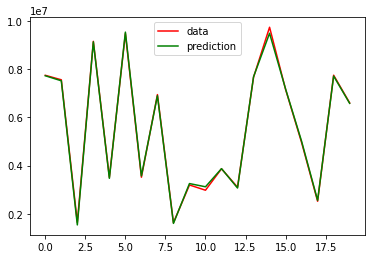

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[:20], c='r', label = 'data')
plt.plot(A,y_predict[:20], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


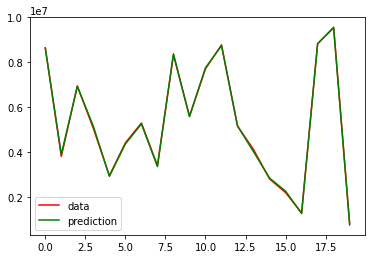

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[20:40], c='r', label = 'data')
plt.plot(A,y_predict[20:40], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


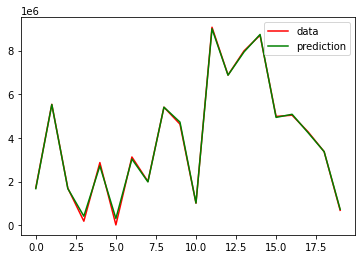

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[40:60], c='r', label = 'data')
plt.plot(A,y_predict[40:60], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()